# QWEN IMAGE EDIT torchao | Medium VRAM configuration <br> (~23GB of VRAM)

In [9]:
import torch
from PIL import Image
from diffusers import AutoModel, DiffusionPipeline, TorchAoConfig

## Model Paths

In [10]:
model_id = "/path/to/weights/Qwen-Image-Edit"
lora_path = "/path/to/weights/Qwen-Lora/Qwen-Image-Lightning-8steps-V1.1.safetensors"
# lora_path "/path/to/weights/Qwen-Lora/Qwen-Image-Lightning-4steps-V1.0.safetensors"

## Configuration of Weights

In [11]:
torch_dtype = torch.bfloat16
device = "cuda"

# TorchAO int8 weight-only on transformer
quantization_config = TorchAoConfig("int8wo")

transformer = AutoModel.from_pretrained(
    model_id,
    subfolder="transformer",
    quantization_config=quantization_config,
    torch_dtype=torch_dtype,
)
pipe = DiffusionPipeline.from_pretrained(
    model_id, 
    transformer=transformer, 
    torch_dtype=torch_dtype,
)
pipe.enable_model_cpu_offload()




Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

## Configuration of Lora Weights

In [12]:
# optional LoRA (works with or without)
pipe.load_lora_weights(lora_path)

## Load Input Image

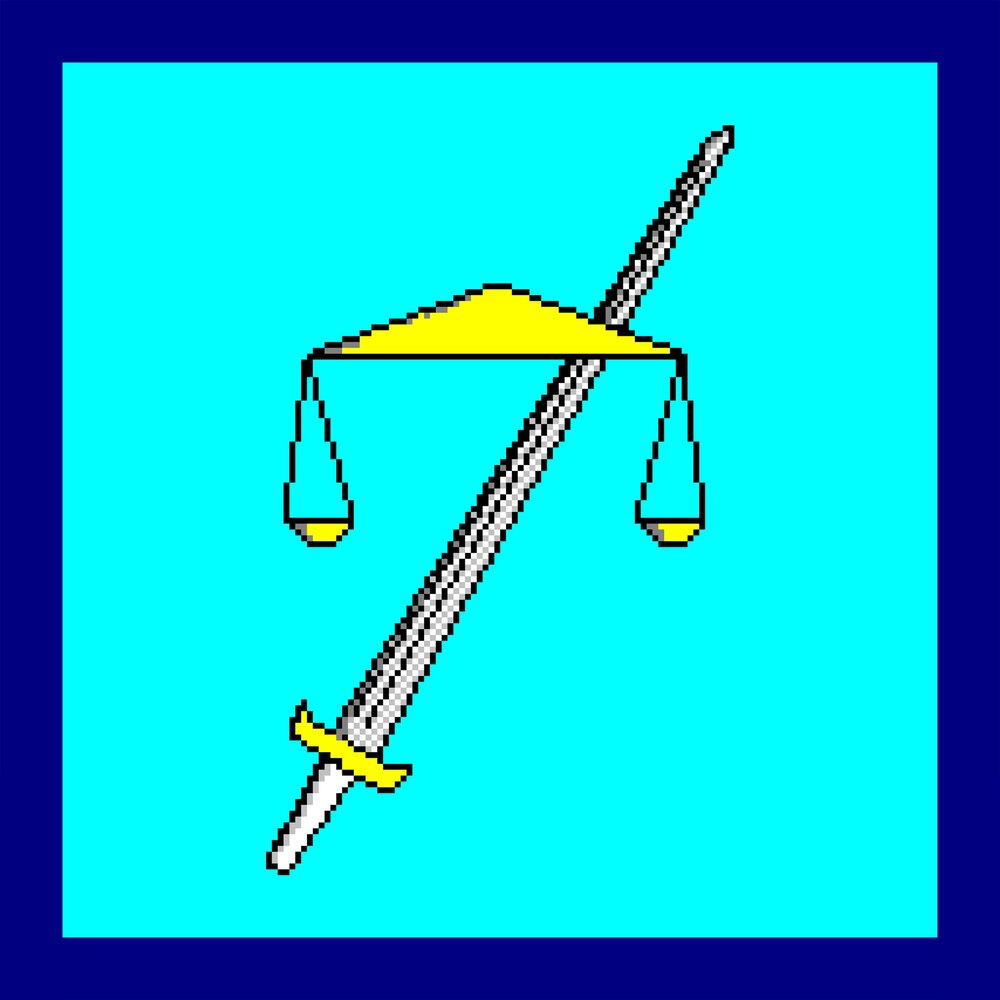

In [17]:
image = Image.open("../assets/temple.jpeg").convert("RGB")
image

## Inference Settings

In [18]:
prompt = (
    "change the rendering of the image into a realistic rendering, preserving the concepts."
    "The sword should be rendered as a real sword. The scale as a real scale."
    "Turn the light blue into a beautiful sky."
    "Turn the dark blue border into a metallic rendering"
)

seed = 42 # The meaning of life.
steps = 8 # 4 if using 4-Step Lora

## Inference

In [19]:
generator = torch.Generator(device="cuda").manual_seed(seed)

# use 8 (or 4) steps if you're using the Lightning LoRA
image = pipe(
    image=image,
    prompt=prompt,
    num_inference_steps=steps,
    generator=generator,
).images[0]


  0%|          | 0/8 [00:00<?, ?it/s]

## Output

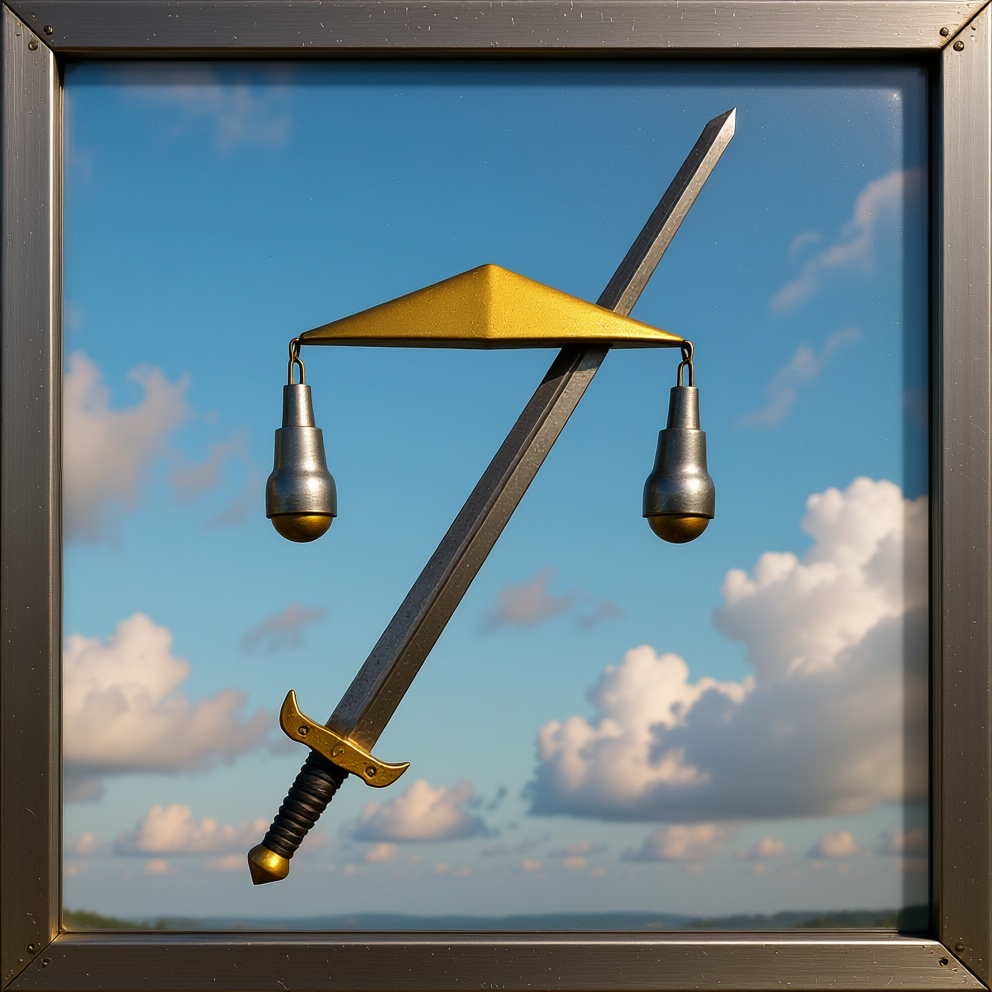

In [20]:
# image.save("qwen_torchao_lora_8step.png")
image